# **Setup dan import**

In [ ]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punknet')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import numpy as np
import io
import unicodedata
import re
import string
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading punknet: Package 'punknet' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# **Tentukan POS (Parts of Speech). INGAT INI BAHASA INGGRIS!**

In [ ]:
DI_POS_TYPES = {'NN':'n' , 'JJ':'a' , 'VB':'v' , 'RB':'r'}
POS_TYPES = list(DI_POS_TYPES.keys())

# constraint dalam token
MIN_STR_LEN = 3         # minimal panjang kata yang akan diolah dan dipecah
RE_VALID = '[a-zA-Z]'   # hanya valid jika huruf

# **Ambil file Corpus dari G-Class dan unggah ke G-Collab!**

In [ ]:
# unggah data ke G-Drive
from google.colab import files
uploaded = files.upload()
print ("Panjangnya dataset kita : ", len (uploaded.keys()))

for fn in uploaded.keys():
  print('Kamu unggah file "{name}" dengan panjang {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# cek isi list dari quotes
df_quotes = pd.read_csv(io.StringIO(uploaded['quotes.txt'].decode('utf-8')), sep='\t')

# tampilkan
print ("df_quotes : ")
print (df_quotes.head().to_string())
print (df_quotes.describe())

# konversikan quotes kedalam bentuk list
li_quotes = df_quotes["Quote"].tolist()
print()
print("Panjangnya li_quotes : ", len(li_quotes))

Saving quotes.txt to quotes.txt
Panjangnya dataset kita :  1
Kamu unggah file "quotes.txt" dengan panjang 6935 bytes
df_quotes : 
            Author                                                                                                                                                                                      Quote
0  Agatha Christie  I like living. I have sometimes been wildly, despairingly, acutely miserable, racked with sorrow; but through it all I still know quite certainly that just to be alive is a grand thing.
1  Agatha Christie                                                                                The impossible could not have happened, therefore the impossible must be possible in spite of appearances. 
2  Agatha Christie                                                                                                       Poirot, I said. I have been thinking. An admirable exercise my friend. Continue it. 
3  Agatha Christie                            

# **TOKENIZER, REMOVE STOP WORDS, STEMMER, & LEMMATIZER**

In [ ]:
# ambil dulu stopword, stemmer, dan lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# hapus aksen
def remove_accents(data):
  return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# proses semua quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(li_quotes):
    # Tokenize per kalimat, kemudian jadikan lowercase
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Proses semua token per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Hapus aksesn
        t = remove_accents(token)

        # Hapus punctuation/tanda baca
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)

        # Tambahkan token yang mewakili "tidak ada kecocokan lemmatisasi"
        li_tokens_quote_lem.append("-") # token ini akan dihapus jika ditemukan kecocokan lemmatisasi di bawah

        # Proses setiap token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Ingat bahwa POS (Part Of Speech) diperlukan sebagai masukan ke lemmatizer
                    # (jika tidak maka diasumsikan kata tersebut adalah kata benda)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default ke noun atau kata benda
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]

                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize dengan POS yang benar

                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Hapus token "-" token dan tambahkan kecocokan lemmatisasi
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1]
                        li_tokens_quote_lem.append(lem)

    # Buat daftar daftar token dari token yang dilemmatisasi
    li_token_lists.append(li_tokens_quote)

    # Buat daftar string dari token yang dilemmatisasi
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)

# Bikin dataframes dari lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Ganti "None" dengan string kosong
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
        0           1       2          3         4         5          6          7         8           9             10         11        12         13      14      15           16      17    18    19       20    21    22    23     24    25     26         27    28    29    30    31     32    33    34     35     36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113
0         i        like  living                    i      have  sometimes       been    wildly              despairingly              acutely  miserable          racked         with  sorrow        

# **PROSES HASIL KATA**

In [ ]:
# Tambahkan counts untuk menghitung total
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
         lem  index      token    stem pos  counts
0     always     50     always   alway  RB      10
1    nothing    116    nothing    noth  NN       6
2       life     54       life    life  NN       6
3        man     74        man     man  NN       5
4       give     39       gave    gave  VB       5
5       fact    106       fact    fact  NN       5
6      world    121      world   world  NN       5
7  happiness    119  happiness   happi  NN       4
8       work    297       work    work  NN       4
9     theory    101     theory  theori  NN       4


# **Cari 10 kata teratas berdasarkan POS**

In [ ]:
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES :
  df_pos = df_words[df_words['pos'] == v]
  print ()
  print ("POS_TYPE : ", v)
  print (df_pos.head(10).to_string())


POS_TYPE :  NN
          lem pos  counts
1     nothing  NN       6
2        life  NN       6
3         man  NN       5
5        fact  NN       5
6       world  NN       5
7   happiness  NN       4
8        work  NN       4
9      theory  NN       4
10      woman  NN       4
17     holmes  NN       3

POS_TYPE :  JJ
              lem pos  counts
11     impossible  JJ       4
15        certain  JJ       3
18        curious  JJ       3
34           nice  JJ       2
43         little  JJ       2
48           good  JJ       2
61     improbable  JJ       2
62           best  JJ       2
72  philosophical  JJ       1
81       possible  JJ       1

POS_TYPE :  VB
          lem pos  counts
4        give  VB       5
12        say  VB       4
13       come  VB       4
22        see  VB       3
23       make  VB       3
26      think  VB       3
29  eliminate  VB       2
39       wish  VB       2
52       lose  VB       2
59       know  VB       2

POS_TYPE :  RB
              lem pos  counts
0   

# **Tampilkan dalam Plot**

li_token_lists_flat[:10]: ['i', 'like', 'living', '', 'i', 'have', 'sometimes', 'been', 'wildly', '']
[('the', 51), ('is', 36), ('to', 33), ('a', 27), ('i', 25), ('and', 25), ('it', 23), ('in', 20), ('that', 19), ('be', 18), ('of', 18), ('you', 17), ('but', 14), ('have', 13), ('not', 12), ('he', 12), ('one', 11), ('all', 10), ('always', 10), ('there', 10), ('for', 9), ('will', 9), ('me', 9), ('when', 8), ('they', 8), ('like', 7), ('with', 7), ('must', 7), ('my', 7), ('do', 7), ('was', 7), ('we', 7), ('what', 7), ('life', 6), ('if', 6), ('nothing', 6), ('his', 6), ('most', 5), ('are', 5), ('s', 5), ('man', 5), ('has', 5), ('world', 5), ('am', 5), ('would', 5), ('impossible', 4), ('said', 4), ('can', 4), ('give', 4), ('nt', 4), ('who', 4), ('happiness', 4), ('only', 4), ('more', 4), ('this', 4), ('any', 4), ('or', 4), ('work', 4), ('still', 3), ('an', 3), ('certain', 3), ('truth', 3), ('however', 3), ('curious', 3), ('them', 3), ('fit', 3), ('facts', 3), ('never', 3), ('felt', 3), ('may'

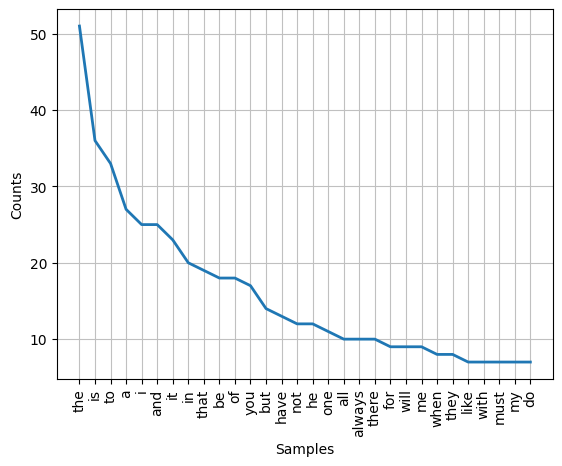

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
li_token_lists_flat = [y for x in li_token_lists for y in x]  # ratakan daftar daftar token menjadi satu daftar
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)

di_freq.plot(30, cumulative=False)

# **Tampilkan Plot frekuensi untuk Stopwords**

[('always', 10), ('life', 6), ('nothing', 6), ('fact', 5), ('give', 5), ('man', 5), ('world', 5), ('come', 4), ('happiness', 4), ('impossible', 4), ('say', 4), ('theory', 4), ('woman', 4), ('work', 4), ('certain', 3), ('curious', 3), ('felt', 3), ('fit', 3), ('holmes', 3), ('however', 3), ('make', 3), ('never', 3), ('order', 3), ('see', 3), ('sherlock', 3), ('still', 3), ('think', 3), ('truth', 3), ('adler', 2), ('artist', 2), ('attention', 2), ('best', 2), ('die', 2), ('dog', 2), ('dull', 2), ('eliminate', 2), ('emotion', 2), ('fine', 2), ('friend', 2), ('good', 2), ('help', 2), ('ignore', 2), ('imagination', 2), ('improbable', 2), ('incident', 2), ('irene', 2), ('know', 2), ('little', 2), ('living', 2), ('lose', 2), ('love', 2), ('mind', 2), ('nice', 2), ('nighttime', 2), ('observe', 2), ('perfect', 2), ('person', 2), ('quite', 2), ('really', 2), ('reason', 2), ('remains', 2), ('storm', 2), ('suit', 2), ('take', 2), ('tea', 2), ('thing', 2), ('time', 2), ('watson', 2), ('wish', 2), (

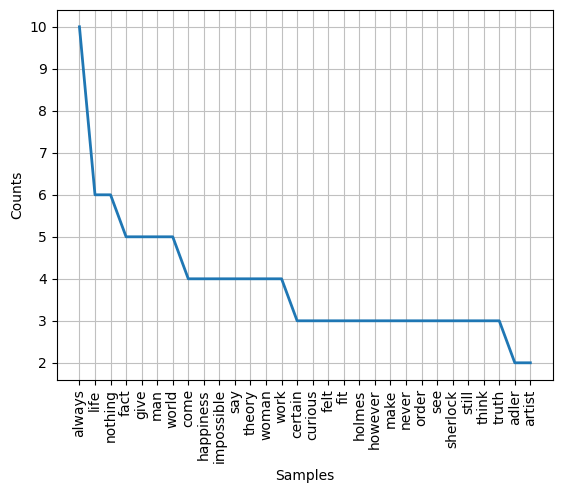

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
li_lem_words = df_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)
print(li_freq_sorted2)

di_freq2.plot(30, cumulative=False)